# **##################### Problem 2 #####################**

In Problem 1, we analyzed a non-linear random RNN by looking at its fixed points and their stability. We made the following predictions: (i) when $g<1$, dynamics converges towards a simple fixed point where $x_i=0$ $\forall i$; (ii) when $g>1$, dynamics runs away from the fixed point. In this exercise, we use programming and numerical integration to characterize this transition, and test dynamics in both regimes.


**a)** The code below builds and simulate a $N=500$ randomly-connected RNN defined as in the previous Problem. Each unit in the RNN also receives a periodic input of frequency $\omega$
$$
h_i = I \cos(\omega t + \theta_i)
$$
where phases $\theta_i$ are distributed uniformely across neurons. To begin with, the value of $I$ is set to zero. 

The code simulates the RNN activity by integrating numerically the dynamics through Euler's method. Dynamics is simulated between $0$ and $t=T=100$. In order to apply Euler's method, we create a discretized time vector ($\Delta t = 0.01$), and then use:
$$x_{i,t+1} = x_{i,t} + \Delta t \frac{d x_{i,t}}{d t} = 
(1 - \Delta t )x_{i,t} + \Delta t \left[ \sum_{j=1}^{N} J_{i j} \phi\left(x_{j,t}\right)+h_{i,t} \right].$$

Take some time to familiarize with the code and make sure you understand every part.


In [17]:
### Import libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from mpl_toolkits import mplot3d
from matplotlib import rc
#rc('text', usetex=True)

### Plot configuration

fig_width = 4.2 # width in inches
fig_height = 3.  # height in inches
fig_size =  [fig_width,fig_height]
plt.rcParams['figure.figsize'] = fig_size
plt.rcParams['figure.autolayout'] = True
plt.rcParams['font.size'] = 12
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False


#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### ####
#### Generate network

N = 500      # Network size
g = 1.8      # Connectivity strength
I = 0      # Input strength
omega = 2.5  # Input frequency

# Connectivity

J = g/np.sqrt(N) * np.random.normal(0, 1., (N,N))
eig = np.linalg.eigvals(J)

# Input phases

theta = 2. * np.pi * np.random.uniform(0, 1., N)


#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### ####
#### Simulate activity 

# Function simulating one time step

def sim_step (x_step, t_step):
  x_step = (1.0-dt) * x_step + dt * np.dot(J, np.tanh(x_step)) + dt * I * np.cos(omega*t_step + theta)
  return x_step

# Parameters

T = 1000                          # Total time
dt = 0.01                        # Time step
t = np.linspace(0, T, int(T/dt))      # Time array

# Activity vector (time x neurons), initialize at random

x = np.zeros(( len(t), N ))
x[0,:] = np.random.normal(0, 1., N)

# Simulate dynamics

for it, ti in enumerate(t[:-1]):
	x[it+1,:] = sim_step(x[it,:], ti)

r = np.tanh(x)

**b)** Set $I=0$. Now pick to values of $g$, respectively below and above 1. Simulate dynamics, and plot the firing rate activity $\phi(x_j)$ of 3 sample neurons. Is activity in agreement with the prediction from Problem 1?

**SOLUTION:**

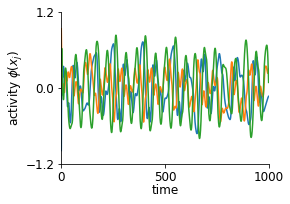

In [16]:
#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### ####
#### Plot activity of the first 3 neurons

fg = plt.figure()
ax0 = plt.axes(frameon=True)

plt.plot(t, r[:,0:3])

plt.xlabel('time')
plt.ylabel(r'activity $\phi(x_j)$')

plt.xlim(0, T)
plt.ylim(-1.2, 1.2)
plt.xticks([0, T//2, T])
plt.yticks([-1.2, 0, 1.2])
plt.show()

**c)** Now turn up the input amplitude $I$, first to 0.01 and then to 1, and see how the firing rates of the same 3 units in **b)** changed in response to the increasing strength of the drive.


**d)** Calculate the covariance matrix of activity in each of the above scenarios: no input, weak input, and strong input. The covariance matrix is mathematically defined as:
$$
C_{ij} = \langle\phi(x_i)\phi(x_j)\rangle - \langle\phi(x_i)\rangle \langle\phi(x_j)\rangle 
$$
where the average is taken over time. 
Check to make sure that this comes out as an NxN matrix. Diagonalize this covariance matrix and project the activity onto a coordinate frame made up of the eigenvectors corresponding to the largest 3 eigenvalues of this covariance matrix. This is Principal Components Analysis; the eigenvectors of the covariance matrix gives you the PCs. If you did this correctly, congratulations, you have made your first State Space diagram! 

*Hint:  In Python, you can use from sklearn.decomposition import PCA, or compute the covariance matrix from a matrix multiplication.*

**SOLUTION:**

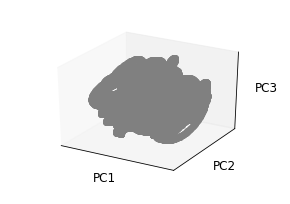

In [18]:
#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### ####
#### Do PCA

# Center the data

r = r - np.outer(np.ones(len(t)), np.mean(r,0))

# Compute covariance matrix

C = np.dot(r.T, r) / len(t)

# Compute eigenvectors

V = np.linalg.eigh(C)[1]

#### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### #### ####
#### Plot activity in the first 3 PC

fig = plt.figure()
ax = plt.axes(projection='3d')

# Plot every int_t = 10 steps
int_t = 10
ax.plot(np.dot(r[::int_t,:], V[:,-1]), np.dot(r[::int_t,:], V[:,-2]), np.dot(r[::int_t,:], V[:,-3]), '-o',color = '0.5')

plt.rcParams['axes.labelpad'] = 0.1
ax.dist = 12

ax.grid('off')

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()